In [1]:
%matplotlib widget
from mayavi import mlab
mlab.init_notebook()

Notebook initialized with ipy backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy
sy.init_printing() 
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
mlab.init_notebook(backend='x3d')

Notebook initialized with x3d backend.


我们从在 Python 环境中绘图基础开始，同时复习线性方程组。

# <font face="gotham" color="purple"> 线性方程组的可视化 </font>

考虑一个由两个方程组成的线性系统：
\begin{align}
x+y&=6\\
x-y&=-4
\end{align}
很容易求解：$(x, y)^T = (1, 5)^T$。让我们绘制这个线性系统。

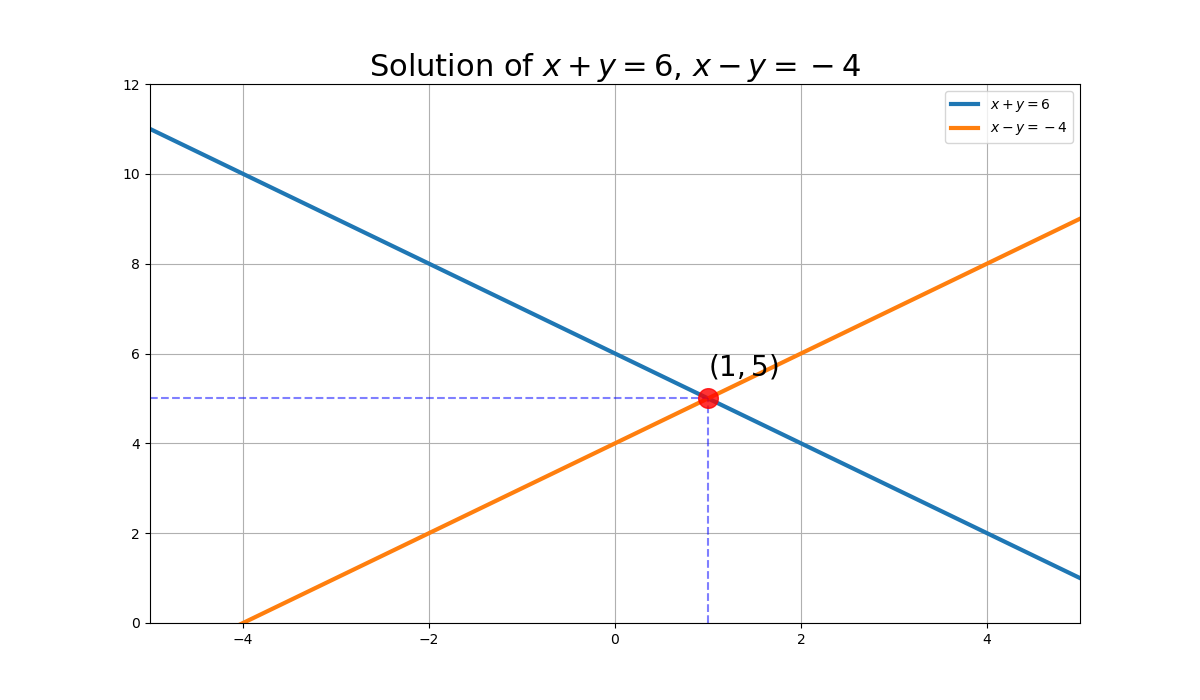

In [4]:
x = np.linspace(-5, 5, 100)
y1 = -x + 6
y2 = x + 4

fig, ax = plt.subplots(figsize = (12, 7))
ax.scatter(1, 5, s = 200, zorder=5, color = 'r', alpha = .8) 

ax.plot(x, y1, lw =3, label = '$x+y=6$')
ax.plot(x, y2, lw =3, label = '$x-y=-4$')
ax.plot([1, 1], [0, 5], ls = '--', color = 'b', alpha = .5)
ax.plot([-5, 1], [5, 5], ls = '--', color = 'b', alpha = .5)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 12])

ax.legend()
s = '$(1,5)$'
ax.text(1, 5.5, s, fontsize = 20)
ax.set_title('Solution of $x+y=6$, $x-y=-4$', size = 22)
ax.grid()

# <font face="gotham" color="purple"> 如何绘制一个平面 </font>

在绘制平面之前，让我们复习一下 Matplotlib 3D 绘图的逻辑。如果你是 MATLAB 用户，这应该很熟悉。

首先，创建网格。

In [5]:
x, y = [-1, 0, 1], [-1, 0, 1]
X, Y = np.meshgrid(x, y)

数学上，网格是<font face="gotham" color="red">笛卡尔积</font>的坐标。举例说明，我们可以绘制这些网格的所有坐标。

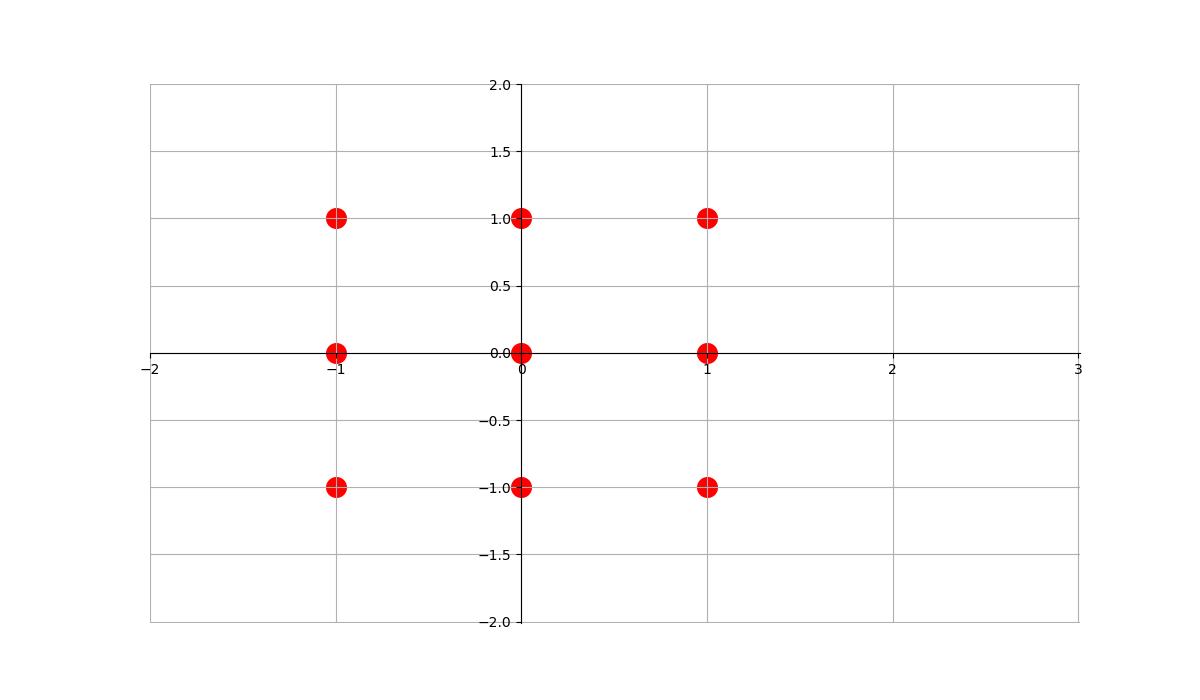

In [6]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.scatter(X, Y, s = 200, color = 'red')
ax.axis([-2, 3.01, -2.01, 2])
ax.spines['left'].set_position('zero') # alternative position is 'center'
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.grid()
plt.show()

尝试一个更复杂的网格。

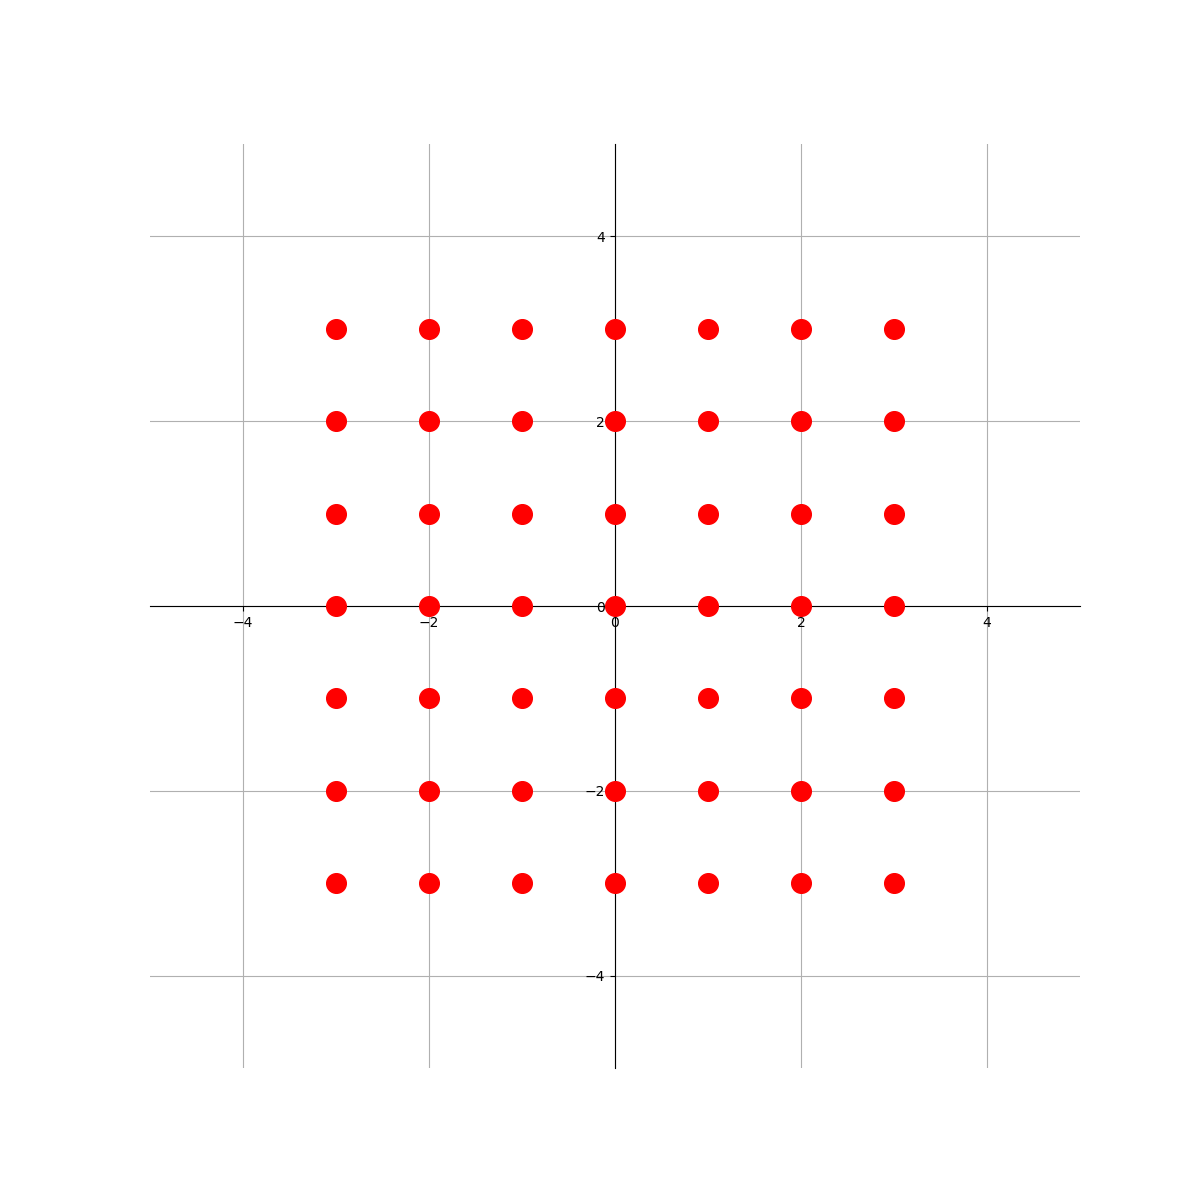

In [7]:
x, y = np.arange(-3, 4, 1), np.arange(-3, 4, 1)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize = (12, 12))
ax.scatter(X, Y, s = 200, color = 'red', zorder = 3)
ax.axis([-5, 5, -5, 5])

ax.spines['left'].set_position('zero') # alternative position is 'center'
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.grid()

现在考虑函数 $z = f(x, y)$，其中 $z$ 在第三维。虽然 Matplotlib 不适用于精细绘制 3D 图形，但基本的 3D 绘图仍然可以接受。

例如，我们定义一个简单的平面为 
$$z= x + y$$
然后绘制 $z$

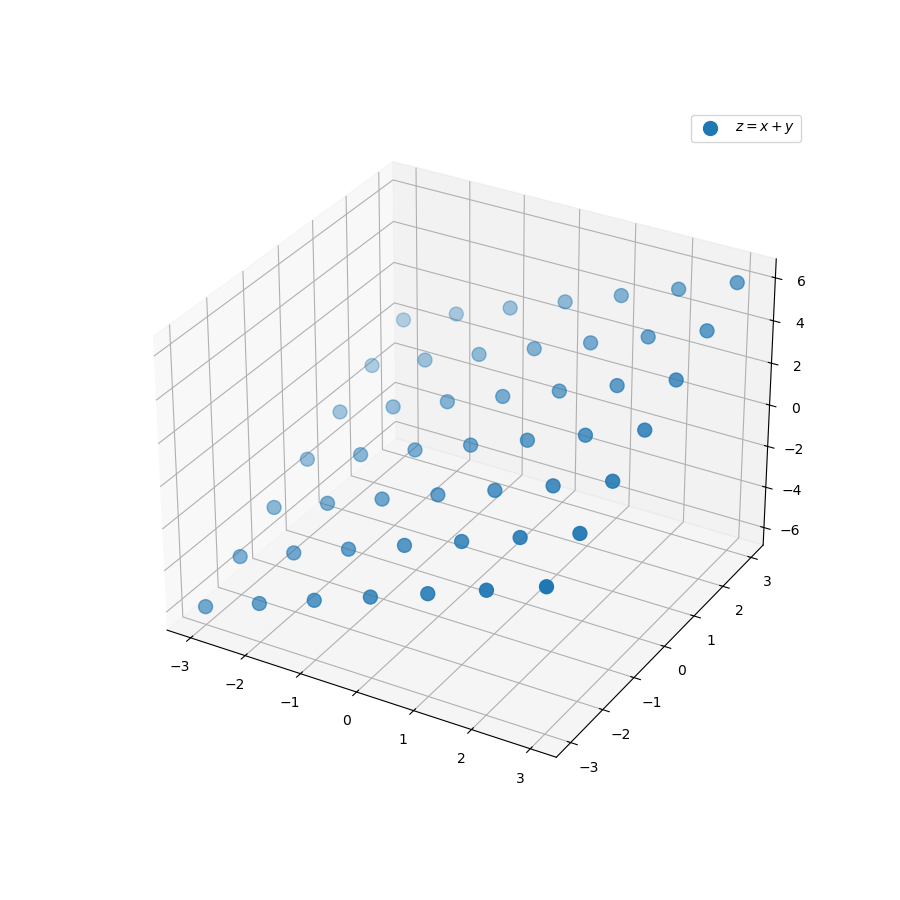

In [8]:
Z = X + Y
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X, Y, Z, s = 100, label = '$z=x+y$')
ax.legend()
plt.show()

或者我们可以将其绘制为一个曲面，Matplotlib 会自动在笛卡尔坐标之间插值，使得图形看起来像一个曲面。

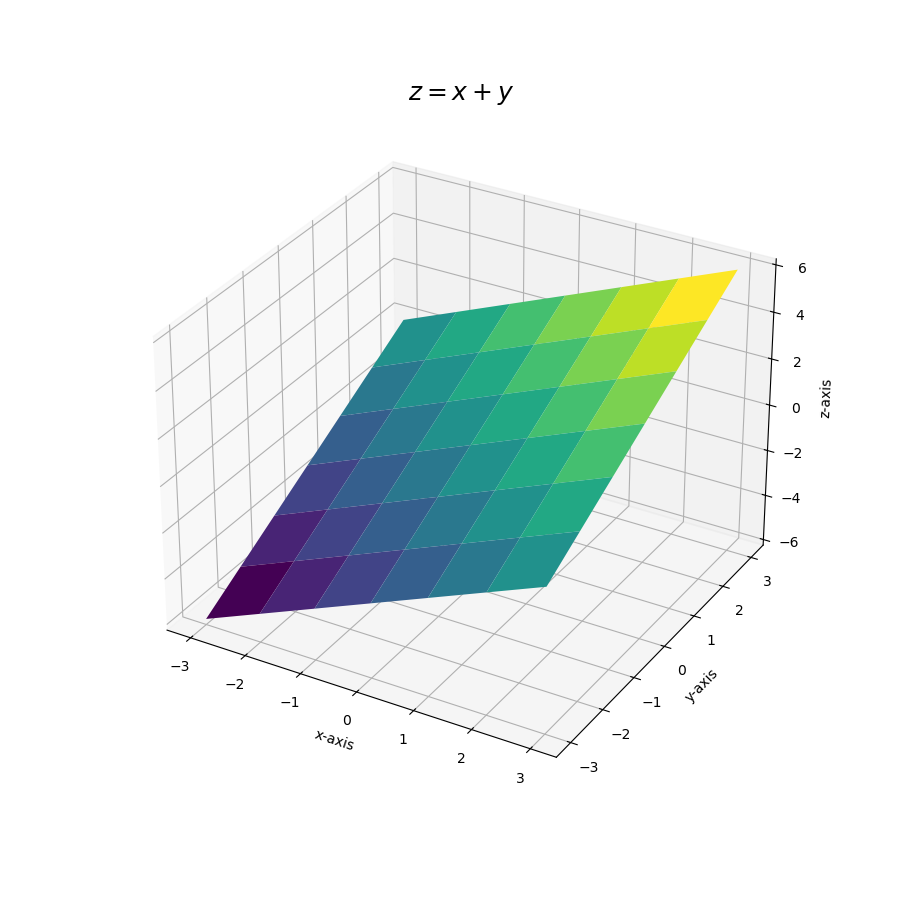

In [9]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z, cmap ='viridis') # MATLAB default color map
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('$z=x+y$', size = 18)
plt.show()

# <font face="gotham" color="purple"> 三个线性方程组的可视化  </font>

我们已经复习了如何绘制平面，现在我们准备好一起绘制多个平面了。

考虑这个线性方程组
\begin{align}
x_1- 2x_2+x_3&=0\\
2x_2-8x_3&=8\\
-4x_1+5x_2+9x_3&=-9
\end{align}
解为 $(x_1, x_2, x_3)^T = (29, 16, 3)^T$。让我们通过可视化重新生成这个系统。

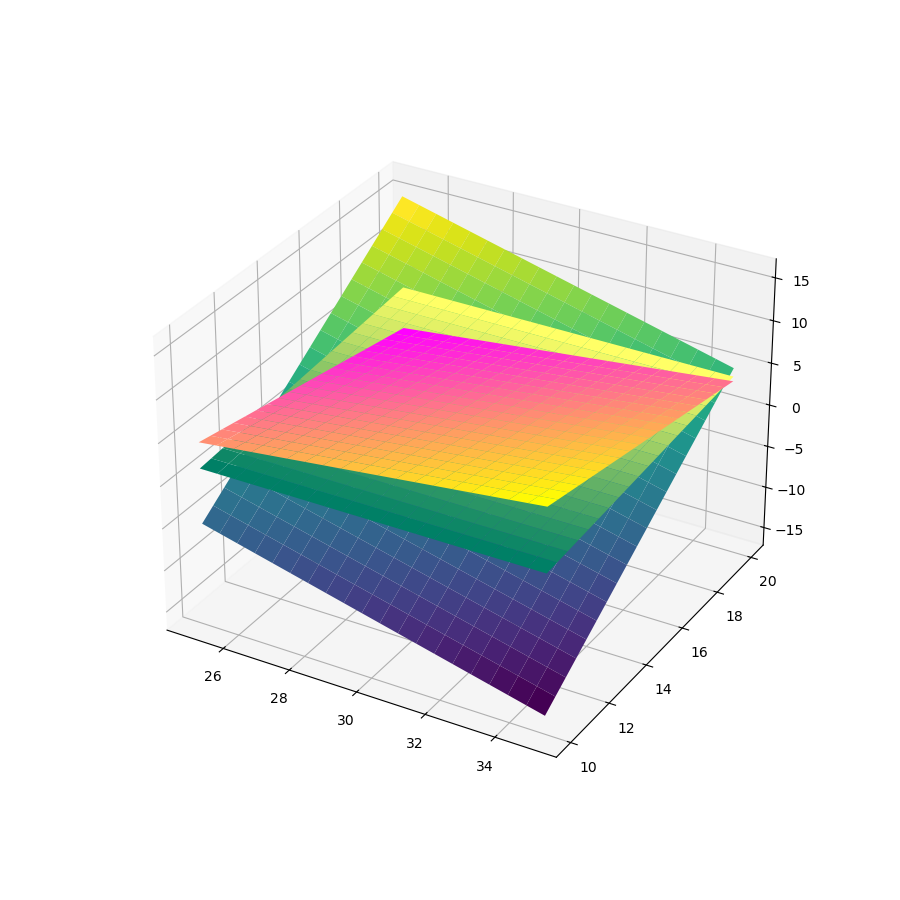

In [10]:
x1 = np.linspace(25, 35, 20)
x2 = np.linspace(10, 20, 20)
X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')

X3 = 2*X2 - X1
ax.plot_surface(X1, X2, X3, cmap ='viridis', alpha = 1) 

X3 = .25*X2 - 1
ax.plot_surface(X1, X2, X3, cmap ='summer', alpha = 1)

X3 = -5/9*X2 + 4/9*X1 - 1
ax.plot_surface(X1, X2, X3, cmap ='spring', alpha = 1)

ax.scatter(29, 16, 3, s = 200, color = 'black')
plt.show()

我们确定存在解，但是图形没有显示平面的交点。这个问题源于 Matplotlib 的渲染算法，它并不是为了绘制真正的 3D 图形而设计的。它只是将 3D 对象投影到 2D 维度上，以模拟 3D 特征。

Mayavi 在渲染 3D 图形方面更加专业，我们在这里给出一个示例。如果没有安装，请运行 ```conda install -c anaconda mayavi```。

In [13]:
mlab.clf()
mlab.init_notebook()
X1, X2 = np.mgrid[-10:10:21*1j, -5:10:21*1j]
X3 = 6 - X1 - X2
mlab.mesh(X1, X2, X3,colormap="spring")
X3 = 3 - 2*X1 + X2
mlab.mesh(X1, X2, X3,colormap="winter")
X3 = 3*X1 + 2*X2 -4
mlab.mesh(X1, X2, X3,colormap="summer")
mlab.axes()
mlab.outline()
mlab.points3d(1, 2, 3, color = (.8, 0.2, .2), )
mlab.title('A System of Linear Equations')

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

## <font face="gotham" color="purple"> 一个不一致系统的可视化 </font>

现在让我们可视化一个没有解的线性系统。

\begin{align}
x+y+z&=1\\
x-y-2z&=2\\
2x-z&=1
\end{align}
重新排列系统以解出 $z$：

\begin{align}
z&=1-x-y\\
z&=\frac{x}{2}-\frac{y}{2}+1\\
z&=2x-1
\end{align}

In [14]:
mlab.clf()
X, Y = np.mgrid[-5:5:21*1j, -5:5:21*1j]
Z = 1 - X - Y
mlab.mesh(X, Y, Z,colormap="spring")

Z = X/2 - Y/2 + 1
mlab.mesh(X, Y, Z,colormap="summer")

Z = 2*X - 1
mlab.mesh(X, Y, Z,colormap="autumn")
mlab.axes()
mlab.outline()
mlab.title('A Inconsistent System of Linear Equations')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

## <font face="gotham" color="purple"> 一个具有无穷多解的系统的可视化</font>

我们的方程组给定如下

\begin{align}
y-z=&4\\
2x+y+2z=&4\\
2x+2y+z=&8
\end{align}

重新排列以解出 $z$

\begin{align}
z=&y-4\\
z=&2-x-\frac{y}{2}\\
z=&8-2x-2y
\end{align}

In [15]:
mlab.clf()
X, Y = np.mgrid[-2:2:21*1j, 2:6:21*1j]
Z = Y - 4
mlab.mesh(X, Y, Z,colormap="spring")

Z = 2 - X - Y/2
mlab.mesh(X, Y, Z,colormap="summer")

Z = 8 - 2*X - 2*Y
mlab.mesh(X, Y, Z,colormap="autumn")
mlab.axes()
mlab.outline()
mlab.title('A System of Linear Equations With Infinite Number of Solutions')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

方程组的解为 $(x,y,z)=(-3z/2,z+4,z)^T$，其中 $z$ 是一个**自由变量**。

解是 $\mathbb{R}^3$ 中的一个无限直线，要可视化解，需要设置 $x$ 和 $y$ 的范围，例如我们可以设置

\begin{align}
-2 \leq x \leq 2\\
2 \leq y \leq 6
\end{align}

这意味着

\begin{align}
-2\leq -\frac32z\leq 2\\
2\leq z+4 \leq 6
\end{align}

我们可以选择一个不等式来设定 $z$ 的范围，例如第二个不等式：$-2 \leq z \leq 2$。

然后将平面和解一起绘制。

In [16]:
mlab.clf()
X, Y = np.mgrid[-2:2:21*1j, 2:6:21*1j]
Z = Y - 4
mlab.mesh(X, Y, Z,colormap="spring")

Z = 2 - X - Y/2
mlab.mesh(X, Y, Z,colormap="summer")

Z = 8 - 2*X - 2*Y
mlab.mesh(X, Y, Z,colormap="autumn")

ZL = np.linspace(-2, 2, 20) # ZL means Z for line, we have chosen the range [-2, 2]
X = -3*ZL/2
Y = ZL + 4

mlab.plot3d(X, Y, ZL)

mlab.axes()
mlab.outline()
mlab.title('A System of Linear Equations With Infinite Number of Solutions')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

# <font face="gotham" color="purple"> 简化行阶梯形式 </font>

为了方便演示，我们在讲座中会经常使用 SymPy。SymPy 是一个非常强大的符号计算库，随着讲座的进行，我们将看到它的基本特性。

我们定义一个 SymPy 矩阵：

In [19]:
M = sy.Matrix([[5, 0, 11, 3], [7, 23, -3, 7], [12, 11, 3, -4]]); M

⎡5   0   11  3 ⎤
⎢              ⎥
⎢7   23  -3  7 ⎥
⎢              ⎥
⎣12  11  3   -4⎦

把它看作一个**增广矩阵**，它合并了线性系统的系数。通过行操作，我们可以快速解决系统。让我们将其转换为**行简化阶梯形式**。

In [20]:
M_rref = M.rref(); M_rref # .rref() 对矩阵进行行最简形式，返回两个值：第一个是最简矩阵，第二个是包含主元列的索引列表。

⎛⎡         -2165 ⎤           ⎞
⎜⎢1  0  0  ──────⎥           ⎟
⎜⎢          1679 ⎥           ⎟
⎜⎢               ⎥           ⎟
⎜⎢          1358 ⎥           ⎟
⎜⎢0  1  0   ──── ⎥, (0, 1, 2)⎟
⎜⎢          1679 ⎥           ⎟
⎜⎢               ⎥           ⎟
⎜⎢          1442 ⎥           ⎟
⎜⎢0  0  1   ──── ⎥           ⎟
⎝⎣          1679 ⎦           ⎠

取出大括号中的第一个元素，即 rref 矩阵。

In [17]:
M_rref = np.array(M_rref[0]);M_rref

array([[1, 0, 0, -2165/1679],
       [0, 1, 0, 1358/1679],
       [0, 0, 1, 1442/1679]], dtype=object)

如果你不喜欢分数，将其转换为浮点类型。

In [18]:
M_rref.astype(float)

array([[ 1.   ,  0.   ,  0.   , -1.289],
       [ 0.   ,  1.   ,  0.   ,  0.809],
       [ 0.   ,  0.   ,  1.   ,  0.859]])

rref 矩阵的最后一列是系统的解。

## <font face="gotham" color="purple"> 示例：rref 和可视化 </font>

让我们使用 ```.rref()``` 方法来计算系统的解，然后将其可视化。考虑以下系统：

\begin{align}
3x+6y+2z&=-13\\
x+2y+z&=-5\\
-5x-10y-2z&=19
\end{align}

将增广矩阵提取为一个 SymPy 矩阵：

In [19]:
A = sy.Matrix([[3, 6, 2, -13], [1, 2, 1, -5], [-5, -10, -2, 19]]);A

⎡3    6   2   -13⎤
⎢                ⎥
⎢1    2   1   -5 ⎥
⎢                ⎥
⎣-5  -10  -2  19 ⎦

In [20]:
A_rref = A.rref(); A_rref

⎛⎡1  2  0  -3⎤        ⎞
⎜⎢           ⎥        ⎟
⎜⎢0  0  1  -2⎥, (0, 2)⎟
⎜⎢           ⎥        ⎟
⎝⎣0  0  0  0 ⎦        ⎠

如果你想知道 $(0, 2)$ 是什么意思：它们是主元列的列号，在上面的增广矩阵中，主元列位于第 $0$ 和第 $2$ 列。

因为它不是一个秩矩阵，所以解是以一般形式表示的
\begin{align}
x + 2y & = -3\\
z &= -2\\
y &= 自由
\end{align}
让我们选择 $y$ 的 $3$ 个不同的值，例如 $(3, 5, 7)$，来计算 $3$ 个特殊解：

In [23]:
point1 = (-2*3-3, 3, -2)
point2 = (-2*5-3, 5, -2)
point3 = (-2*7-3, 7, -2)
special_solution = np.array([point1, point2, point3]); special_solution # each row is a special solution

array([[ -9,   3,  -2],
       [-13,   5,  -2],
       [-17,   7,  -2]])

我们可以一起将一般解和这三个特殊解可视化。

In [24]:
y = np.linspace(2, 8, 20) # y 是自由变量
x = -3 - 2*y     # 是一个公式
z = np.full((len(y), ), -2) # z 是常数

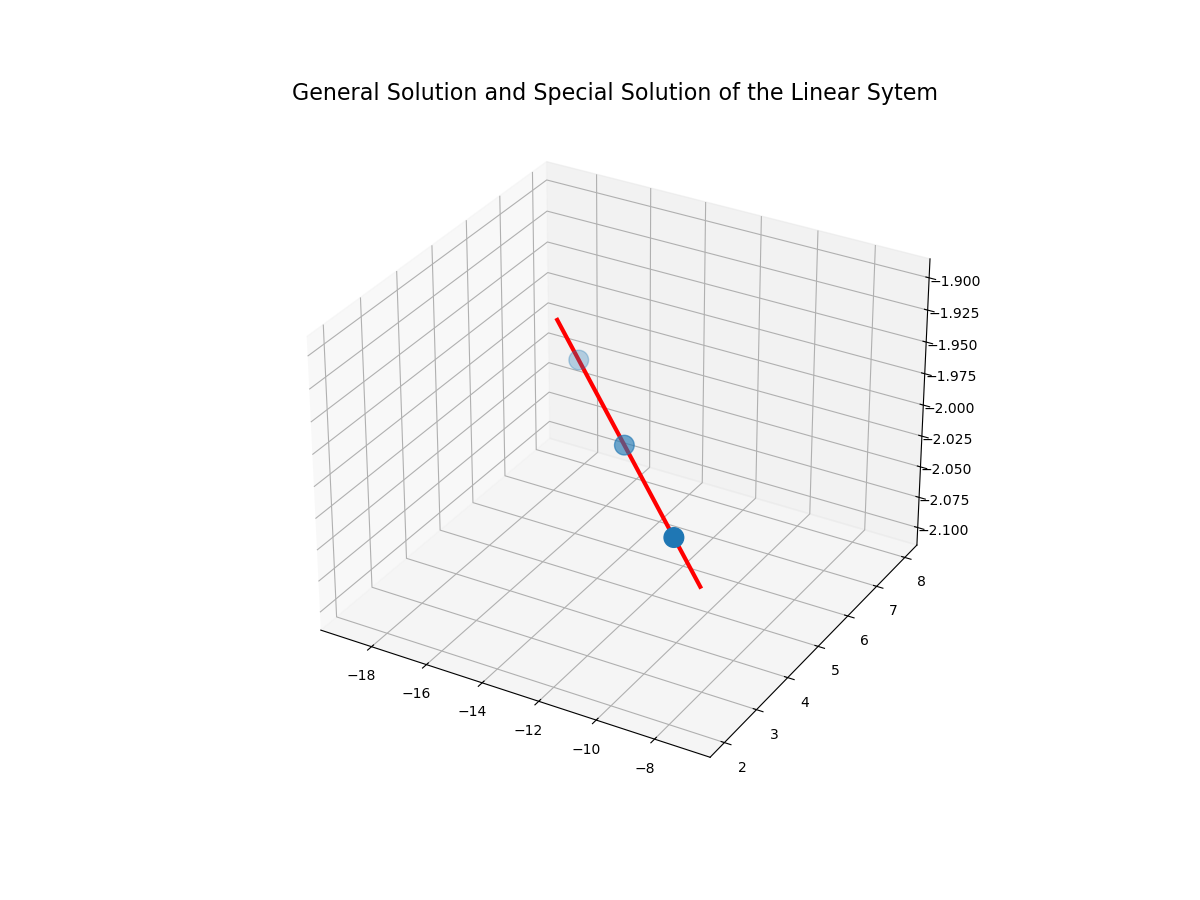

In [25]:
fig = plt.figure(figsize = (12,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw = 3, color = 'red')
ax.scatter(special_solution[:,0], special_solution[:,1], special_solution[:,2], s = 200)
ax.set_title('General Solution and Special Solution of the Linear Sytem', size= 16)
plt.show()

## <font face="gotham" color="purple"> 示例：一个符号解 </font>

考虑一个系统，其中所有右侧的值都是不确定的：

\begin{align}
x + 2y - 3z &= a\\
4x - y + 8z &= b\\
2x - 6y - 4z &= c
\end{align}

我们将 $a, b, c$ 定义为 SymPy 对象，然后提取增广矩阵

In [27]:
a, b, c = sy.symbols('a, b, c', real = True)
A = sy.Matrix([[1, 2, -3, a], [4, -1, 8, b], [2, -6, -4, c]]); A

⎡1  2   -3  a⎤
⎢            ⎥
⎢4  -1  8   b⎥
⎢            ⎥
⎣2  -6  -4  c⎦

我们可以立即使用 ```.rref()``` 方法得到符号解。

In [28]:
A_rref = A.rref(); A_rref

⎛⎡            2⋅a   b   c    ⎤           ⎞
⎜⎢1  0  0     ─── + ─ + ──   ⎥           ⎟
⎜⎢             7    7   14   ⎥           ⎟
⎜⎢                           ⎥           ⎟
⎜⎢          16⋅a   b    10⋅c ⎥           ⎟
⎜⎢0  1  0   ──── + ── - ──── ⎥, (0, 1, 2)⎟
⎜⎢           91    91    91  ⎥           ⎟
⎜⎢                           ⎥           ⎟
⎜⎢           11⋅a   5⋅b   9⋅c⎥           ⎟
⎜⎢0  0  1  - ──── + ─── - ───⎥           ⎟
⎝⎣            91     91   182⎦           ⎠

当然，我们可以替换 $a$、$b$ 和 $c$ 的值来得到一个具体的解。

In [29]:
vDict = {a: 3, b: 6, c: 7}
A_rref = A_rref[0].subs(vDict);A_rref # define a dictionary for special values to substitute in

⎡          31 ⎤
⎢1  0  0   ── ⎥
⎢          14 ⎥
⎢             ⎥
⎢         -16 ⎥
⎢0  1  0  ────⎥
⎢          91 ⎥
⎢             ⎥
⎢         -69 ⎥
⎢0  0  1  ────⎥
⎣         182 ⎦

## <font face="gotham" color="purple">示例：多项式 </font>

考虑这个问题：如何找到一个三次多项式，使其通过每一个点 $(1,3)$，$(2, -2)$，$(3, -5)$ 和 $(4, 0)$。

三次多项式的形式是

\begin{align}
y=a_0+a_1x+a_2x^2+a_3x^3
\end{align}

我们将所有的点代入：

\begin{align}
(x,y)&=(1,3)\qquad\longrightarrow\qquad \ 2=a_0+3a_1+9a_2 +27a_3 \\
(x,y)&=(2,-2)\qquad\longrightarrow\qquad 3=a_0+a_1+a_2+a_3\\
(x,y)&=(3,-5)\qquad\longrightarrow\qquad 2=a_0-4a_1+16a_2-64a_3\\
(x,y)&=(4,0)\qquad\longrightarrow\qquad -2=a_0+2a_1+4a_2+8a_3
\end{align}

这变成了一个线性系统，剩下的步骤应该已经很熟悉了。

增广矩阵是

In [30]:
A = sy.Matrix([[1, 1, 1, 1, 3], [1, 2, 4, 8, -2], [1, 3, 9, 27, -5], [1, 4, 16, 64, 0]]); A

⎡1  1  1   1   3 ⎤
⎢                ⎥
⎢1  2  4   8   -2⎥
⎢                ⎥
⎢1  3  9   27  -5⎥
⎢                ⎥
⎣1  4  16  64  0 ⎦

In [31]:
A_rref = A.rref(); A_rref

⎛⎡1  0  0  0  4 ⎤              ⎞
⎜⎢              ⎥              ⎟
⎜⎢0  1  0  0  3 ⎥              ⎟
⎜⎢              ⎥, (0, 1, 2, 3)⎟
⎜⎢0  0  1  0  -5⎥              ⎟
⎜⎢              ⎥              ⎟
⎝⎣0  0  0  1  1 ⎦              ⎠

In [32]:
A_rref = np.array(A_rref[0]); A_rref

array([[1, 0, 0, 0, 4],
       [0, 1, 0, 0, 3],
       [0, 0, 1, 0, -5],
       [0, 0, 0, 1, 1]], dtype=object)

最后一列是解，即三次多项式的系数。

In [33]:
poly_coef = A_rref.astype(float)[:,-1]; poly_coef

array([ 4.,  3., -5.,  1.])

三次多项式形式是:
\begin{align}
y = 4 + 3x - 5x^2 + x^3
\end{align}

既然我们已经有了三次多项式的具体形式，我们可以绘制它

In [38]:
x = np.linspace(-5, 5, 100)
y = poly_coef[0] + poly_coef[1]*x + poly_coef[2]*x**2 + poly_coef[3]*x**3

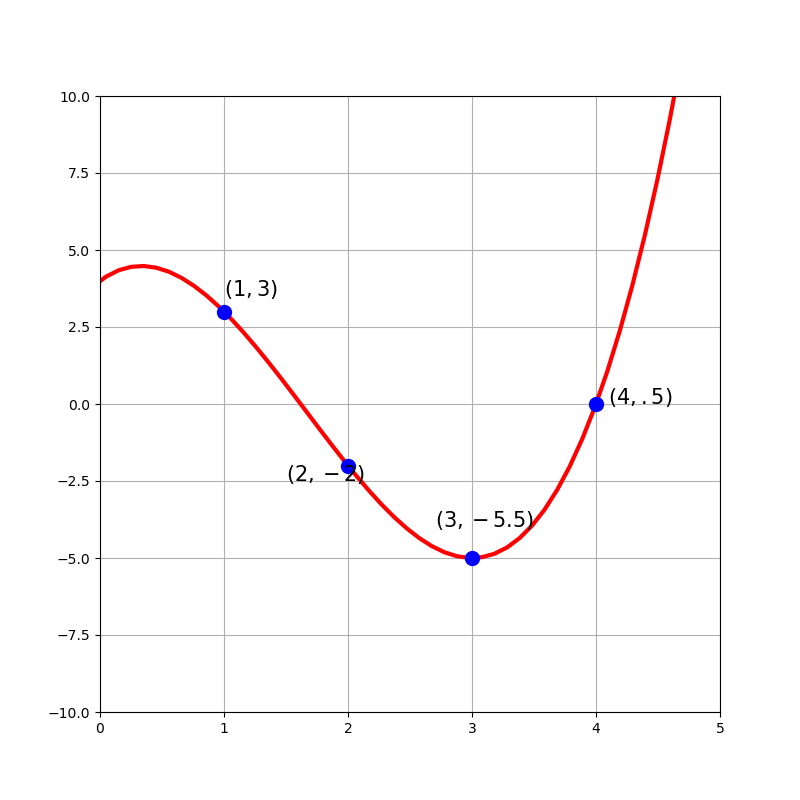

In [39]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(x, y, lw = 3, color ='red')
ax.scatter([1, 2, 3, 4], [3, -2, -5, 0], s = 100, color = 'blue', zorder = 3)
ax.grid()
ax.set_xlim([0, 5])
ax.set_ylim([-10, 10])

ax.text(1, 3.5, '$(1, 3)$', fontsize = 15)
ax.text(1.5, -2.5, '$(2, -2)$', fontsize = 15)
ax.text(2.7, -4, '$(3, -5.5)$', fontsize = 15)
ax.text(4.1, 0, '$(4, .5)$', fontsize = 15)
plt.show()

现在你知道诀窍了，试试另外5个点：$(1,2)$，$(2,5)$，$(3,8)$，$(4,6)$，$(5, 9)$。 多项式形式是
\begin{align}
y=a_0+a_1x+a_2x^2+a_3x^3+a_4x^4
\end{align}

增广矩阵是

In [40]:
A = sy.Matrix([[1, 1, 1, 1, 1, 2],
               [1, 2, 4, 8, 16, 5], 
               [1, 3, 9, 27, 81, 8], 
               [1, 4, 16, 64, 256, 6], 
               [1, 5, 25,125, 625, 9]]); A

⎡1  1  1    1    1   2⎤
⎢                     ⎥
⎢1  2  4    8   16   5⎥
⎢                     ⎥
⎢1  3  9   27   81   8⎥
⎢                     ⎥
⎢1  4  16  64   256  6⎥
⎢                     ⎥
⎣1  5  25  125  625  9⎦

In [41]:
A_rref = A.rref()
A_rref = np.array(A_rref[0])
coef = A_rref.astype(float)[:,-1];coef

array([ 19.   , -37.417,  26.875,  -7.083,   0.625])

In [42]:
x = np.linspace(0, 6, 100)
y = coef[0] + coef[1]*x + coef[2]*x**2 + coef[3]*x**3 + coef[4]*x**4

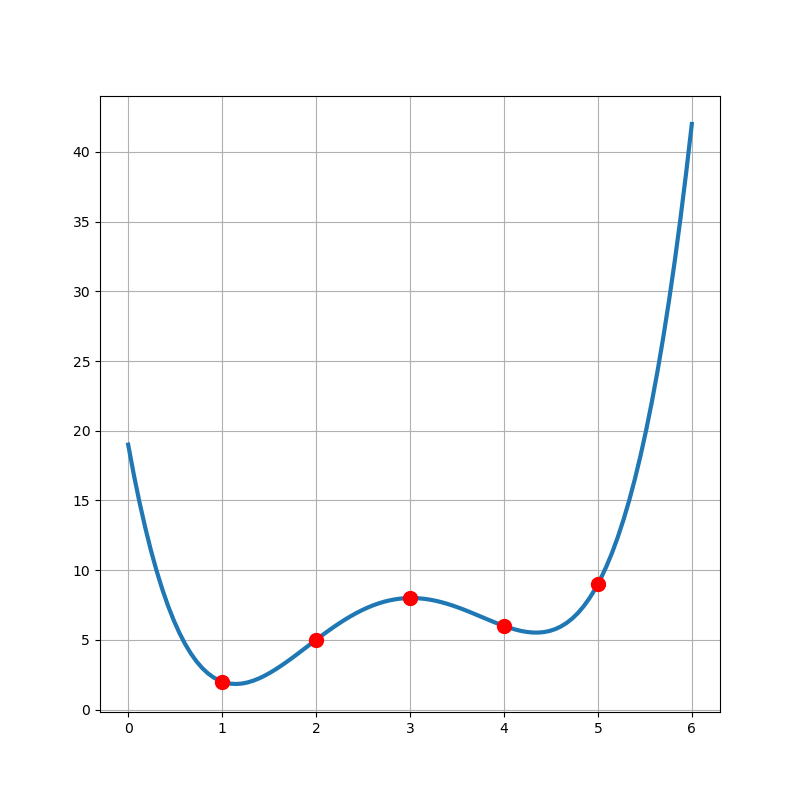

In [43]:
fig, ax = plt.subplots(figsize= (8, 8))
ax.plot(x, y, lw =3)
ax.scatter([1, 2, 3, 4, 5], [2, 5, 8, 6, 9], s= 100, color = 'red', zorder = 3)
ax.grid()

# <font face="gotham" color="purple"> 用 NumPy 解线性方程组 </font>

建立方程组 $A  x =  b$，生成一个随机的 $A$ 和 $b$

In [44]:
A = np.round(10 * np.random.rand(5, 5))
b = np.round(10 * np.random.rand(5,))

In [45]:
x = np.linalg.solve(A, b);x

array([-52.107,  -2.478,   4.126,   2.006,  24.774])

让我们验证是否 $ Ax = b$

In [46]:
A@x - b

array([0., 0., 0., 0., 0.])

它们在技术上是零，由于一些舍入误差被忽略了，这就是为什么 $0$ 前面有 $-$ 的原因。